In [1]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import load_stats, load_oper
from pathlib import Path
from our_values import *
import pandas as pd
import os
from our_functions import  load_calculation, DEL_calculation, filter_ctrl_output, twr_clr_calculation, AEP_calculation
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator


plt.rcParams.update({'font.family': 'serif', 'font.size':16})
from matplotlib.ticker import FormatStrFormatter


# dictionary used to identify which descriptions in the HAWC2 statistics file correspond to which channels we want
# add here if needed
CHAN_DESCS = {'BldPit': 'pitch1 angle',
              'RotSpd': 'rotor speed',
              'Thrust': 'aero rotor thrust',
              'GenTrq': 'generator torque',
              'ElPow': 'pelec',
              'TbFA': 'momentmx mbdy:tower nodenr:   1',
              'TbSS': 'momentmy mbdy:tower nodenr:   1',
              'YbTilt': 'momentmx mbdy:tower nodenr:  11',
              'YbRoll': 'momentmy mbdy:tower nodenr:  11',
              'ShftTrs': 'momentmz mbdy:shaft nodenr:   4',
              'OoPBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: hub1',
              'IPBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: hub1',
              'FlpBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: blade1',
              'EdgBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: blade1',
              'OoPHub': 'momentmx mbdy:hub1 nodenr:   1 coo: hub1',
              'IPHub': 'momentmy mbdy:hub1 nodenr:   1 coo: hub1',
              'ElPow': 'pelec',
              'Twrclr': 'dll :  5 inpvec :   1  min. distance bladetips tower [m]'
              }


# OPERATIONAL AND LOAD DATA

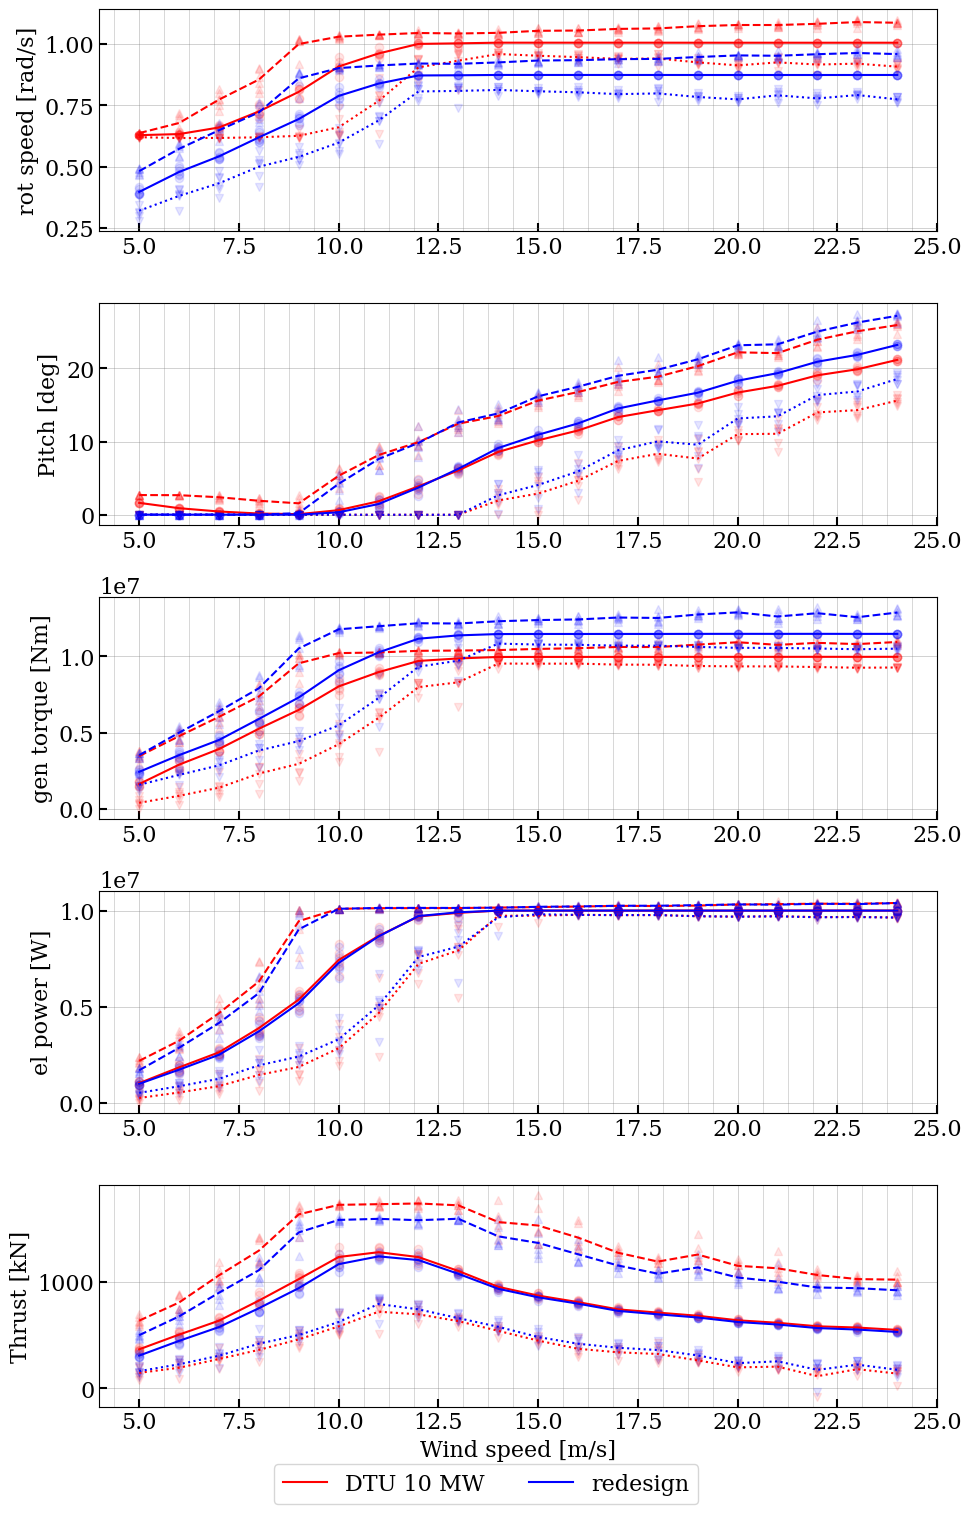

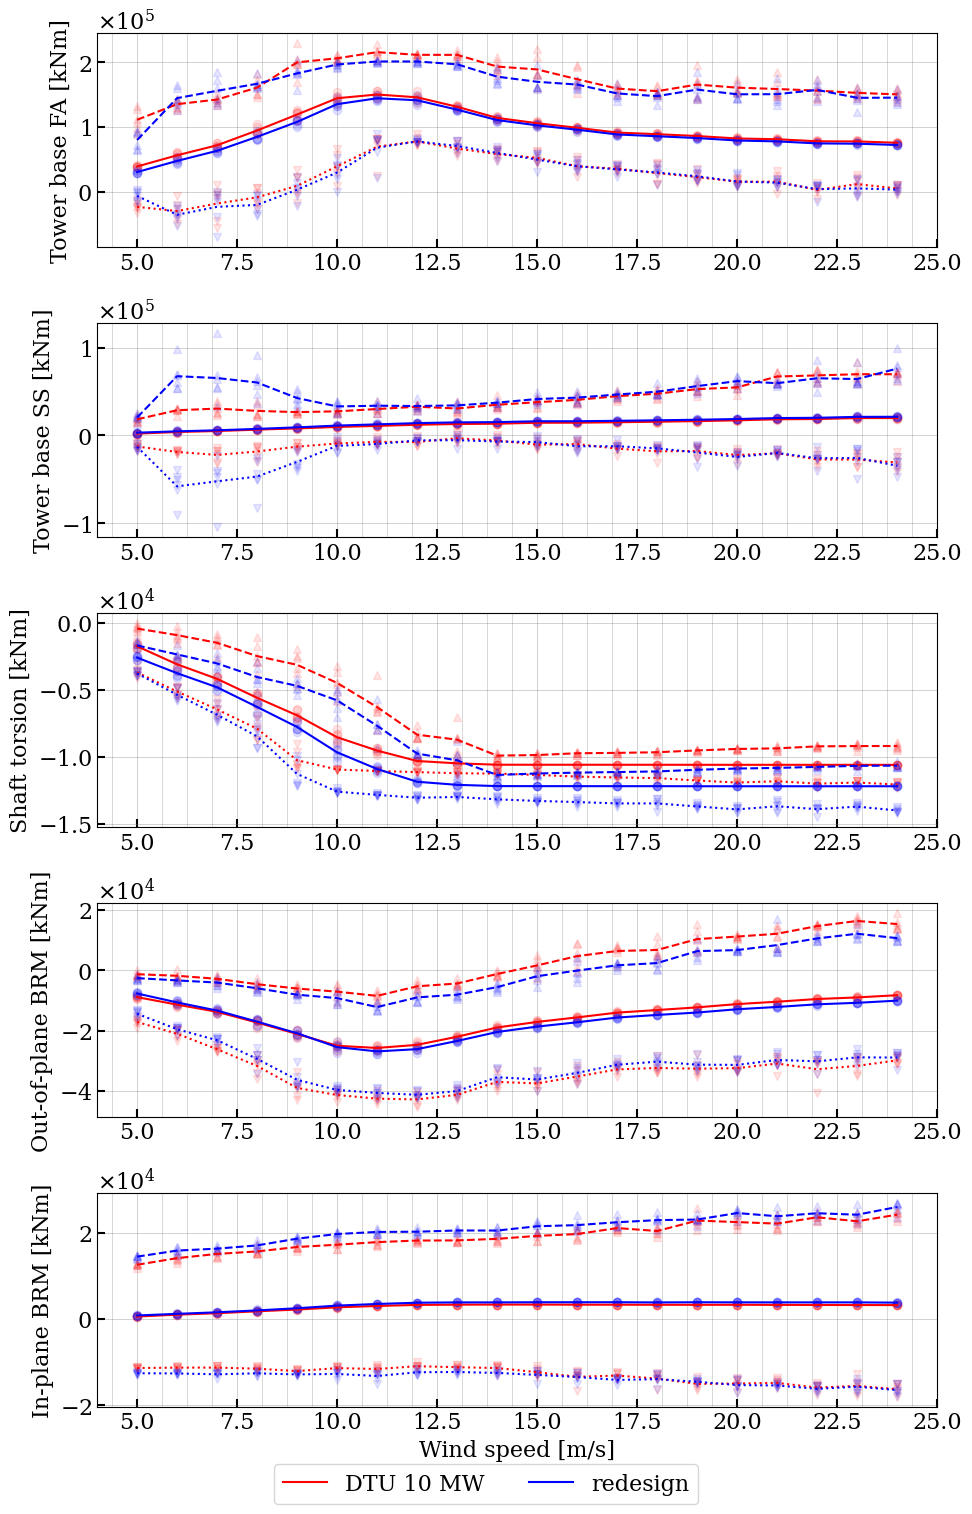

In [2]:
# operational and load data
# operational data:  Rotor speed, pitch angle, generator torque, electrical power, and thrust
# loads data: Tower base fore-aft, tower base side-side, shaft torsion, out-of-plane blade-root moment, in-plane blade-root moment
# encouraged to analyse yaw-bearing tilt and roll, blade flap/edge

chan_ids_operational = ['RotSpd', 'BldPit', 'GenTrq', 'ElPow', 'Thrust']
chan_ids_loads = ['TbFA', 'TbSS', 'ShftTrs', 'OoPBRM', 'IPBRM']


chan_title_operational = ['rot speed [rad/s]', 'Pitch [deg]', 'gen torque [Nm]', 'el power [W]', 'Thrust [kN]']
chan_title_loads = ['Tower base FA [kNm]', 'Tower base SS [kNm]',
             'Shaft torsion [kNm]', 'Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']

operational_DTU = load_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_operational)
operational_our = load_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_operational)
loads_DTU = load_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_loads)
loads_our = load_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_loads)


fig, axs = plt.subplots(5, 1, figsize=(10, 15), clear=True)

for iplot, chan_id in enumerate(chan_ids_operational):

    ax = axs.flatten()[iplot]

    ax.plot(operational_DTU[chan_id]['min']['scatter_wind'],  operational_DTU[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='r')
    ax.plot(operational_DTU[chan_id]['mean']['scatter_wind'], operational_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
    ax.plot(operational_DTU[chan_id]['max']['scatter_wind'],  operational_DTU[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='r')
    ax.plot(operational_our[chan_id]['min']['scatter_wind'],  operational_our[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='b')
    ax.plot(operational_our[chan_id]['mean']['scatter_wind'], operational_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
    ax.plot(operational_our[chan_id]['max']['scatter_wind'],  operational_our[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='b')

    ax.plot(operational_DTU[chan_id]['min']['ws'],  operational_DTU[chan_id]['min']['ave'], linestyle = 'dotted', color='r')
    ax.plot(operational_DTU[chan_id]['mean']['ws'], operational_DTU[chan_id]['mean']['ave'], linestyle = 'solid', color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(operational_DTU[chan_id]['max']['ws'],  operational_DTU[chan_id]['max']['ave'], linestyle = 'dashed', color='r')
    ax.plot(operational_our[chan_id]['min']['ws'],  operational_our[chan_id]['min']['ave'], linestyle = 'dotted', color='b')
    ax.plot(operational_our[chan_id]['mean']['ws'], operational_our[chan_id]['mean']['ave'], linestyle = 'solid', color='b', label='redesign'if iplot == 0 else "")
    ax.plot(operational_our[chan_id]['max']['ws'],  operational_our[chan_id]['max']['ave'], linestyle = 'dashed', color='b')

    ax.set(xlabel='Wind speed [m/s]' if iplot >  3 else None,
        ylabel=f'{chan_title_operational[iplot]}', xlim=[4, 25])

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2)
fig.tight_layout()
fig.savefig(f'plots/operational.pdf', format='pdf',bbox_inches='tight')
plt.show()




fig, axs = plt.subplots(5, 1, figsize=(10, 15), clear=True)
for iplot, chan_id in enumerate(chan_ids_loads):

    ax = axs.flatten()[iplot]

    ax.plot(loads_DTU[chan_id]['min']['scatter_wind'],  loads_DTU[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['max']['scatter_wind'],  loads_DTU[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='r')
    ax.plot(loads_our[chan_id]['min']['scatter_wind'],  loads_our[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='b')
    ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
    ax.plot(loads_our[chan_id]['max']['scatter_wind'],  loads_our[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='b')

    ax.plot(loads_DTU[chan_id]['min']['ws'],  loads_DTU[chan_id]['min']['ave'], linestyle = 'dotted', color='r')
    ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle = 'solid', color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(loads_DTU[chan_id]['max']['ws'],  loads_DTU[chan_id]['max']['ave'], linestyle = 'dashed', color='r')
    ax.plot(loads_our[chan_id]['min']['ws'],  loads_our[chan_id]['min']['ave'], linestyle = 'dotted', color='b')
    ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle = 'solid', color='b', label='redesign'if iplot == 0 else "")
    ax.plot(loads_our[chan_id]['max']['ws'],  loads_our[chan_id]['max']['ave'], linestyle = 'dashed', color='b')

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  3 else None,
           ylabel=f'{chan_title_loads[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2)
fig.tight_layout()
fig.savefig(f'plots/loads.pdf', format='pdf',bbox_inches='tight')
plt.show()


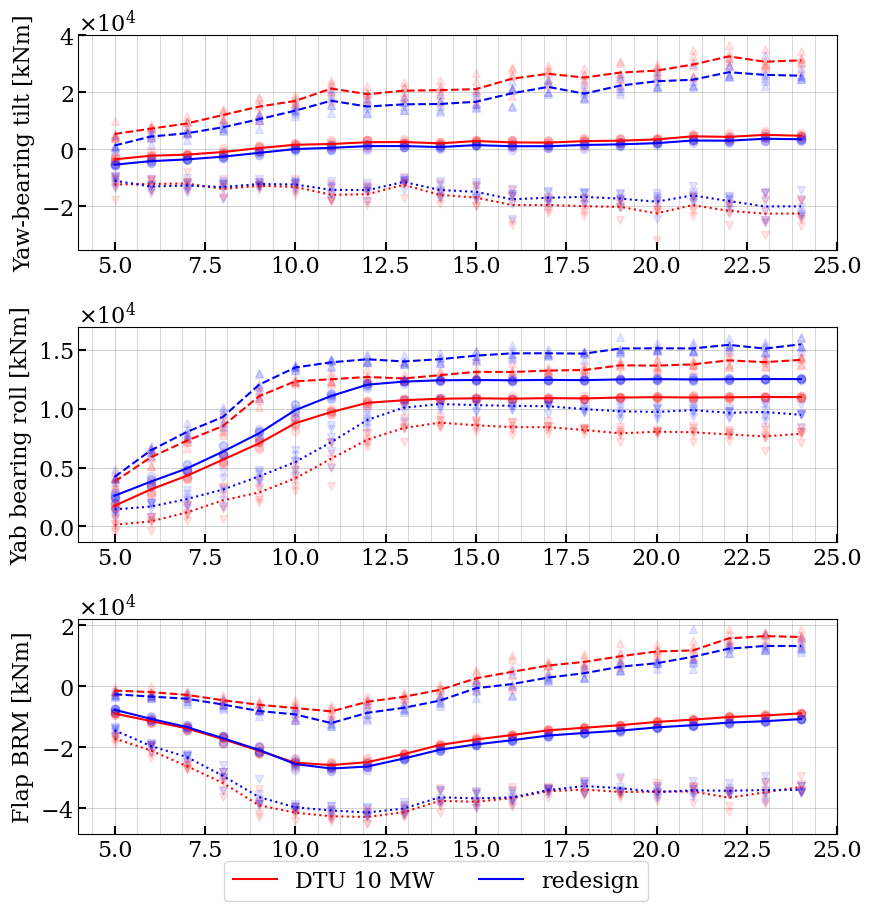

In [3]:
# additional plots

chan_ids_loads = ['YbTilt', 'YbRoll', 'FlpBRM']
chan_title_loads = ['Yaw-bearing tilt [kNm]', 'Yab bearing roll [kNm]', 'Flap BRM [kNm]']


loads_DTU = load_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_loads)
loads_our = load_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_loads)



fig, axs = plt.subplots(3, 1, figsize=(9, 9), clear=True)
for iplot, chan_id in enumerate(chan_ids_loads):

    ax = axs.flatten()[iplot]

    ax.plot(loads_DTU[chan_id]['min']['scatter_wind'],  loads_DTU[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['max']['scatter_wind'],  loads_DTU[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='r')
    ax.plot(loads_our[chan_id]['min']['scatter_wind'],  loads_our[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='b')
    ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
    ax.plot(loads_our[chan_id]['max']['scatter_wind'],  loads_our[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='b')

    ax.plot(loads_DTU[chan_id]['min']['ws'],  loads_DTU[chan_id]['min']['ave'], linestyle = 'dotted', color='r')
    ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle = 'solid', color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(loads_DTU[chan_id]['max']['ws'],  loads_DTU[chan_id]['max']['ave'], linestyle = 'dashed', color='r')
    ax.plot(loads_our[chan_id]['min']['ws'],  loads_our[chan_id]['min']['ave'], linestyle = 'dotted', color='b')
    ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle = 'solid', color='b', label='redesign'if iplot == 0 else "")
    ax.plot(loads_our[chan_id]['max']['ws'],  loads_our[chan_id]['max']['ave'], linestyle = 'dashed', color='b')

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  2 else None,
           ylabel=f'{chan_title_loads[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=2)
fig.tight_layout()
fig.savefig(f'plots/loads_additional.pdf', format='pdf',bbox_inches='tight')
plt.show()

## TOWER CLEARANCE

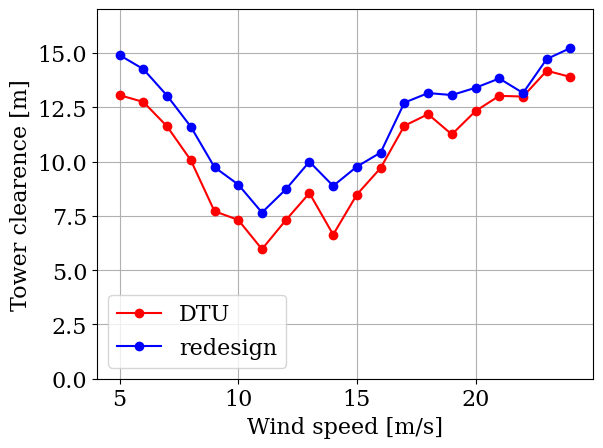

DTU clearance 5.966
our clearance 7.654
difference    28.29%


In [18]:
# tower clearance

clearance_DTU = twr_clr_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS)
clearance_our = twr_clr_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS)

plt.figure()
plt.plot(clearance_DTU['ws'], clearance_DTU['twr_clr'], '-o',  color='r', label='DTU')
plt.plot(clearance_our['ws'], clearance_our['twr_clr'], '-o',  color='b', label='redesign')
plt.grid()
plt.ylim(0,max( clearance_DTU['twr_clr'])*1.2)
plt.ylabel('Tower clearence [m]')
plt.xlabel('Wind speed [m/s]')
plt.legend()
plt.savefig('plots/tower_clearance.pdf', format='pdf',bbox_inches='tight')

plt.show()

print(f'DTU clearance {min(clearance_DTU['twr_clr']):.3f}')
print(f'our clearance {min(clearance_our['twr_clr']):.3f}')
print(f'difference    {(min(clearance_our['twr_clr']) - min(clearance_DTU['twr_clr'])) / min(clearance_DTU['twr_clr'])*100 :.2f}%')

## DEL

   element     |   meterial  |    wohler exp    
   TbFA        |    metal    |        4.0 
   TbSS        |    metal    |        4.0 
   ShftTrs     |    metal    |        4.0 
   OoPBRM      |  composite  |       10.0 
   IPBRM       |  composite  |       10.0 

   element     | R eq life DTU   |  R eq life redesign  |  difference [%]
   TbFA        |   129826.229    |      149323.556      |   15.018
   TbSS        |    55207.146    |      119757.242      |   116.923
   ShftTrs     |     2839.465    |        2649.801      |   -6.680
   OoPBRM      |    31335.804    |       24105.783      |   -23.073
   IPBRM       |    31017.460    |       32244.185      |    3.955


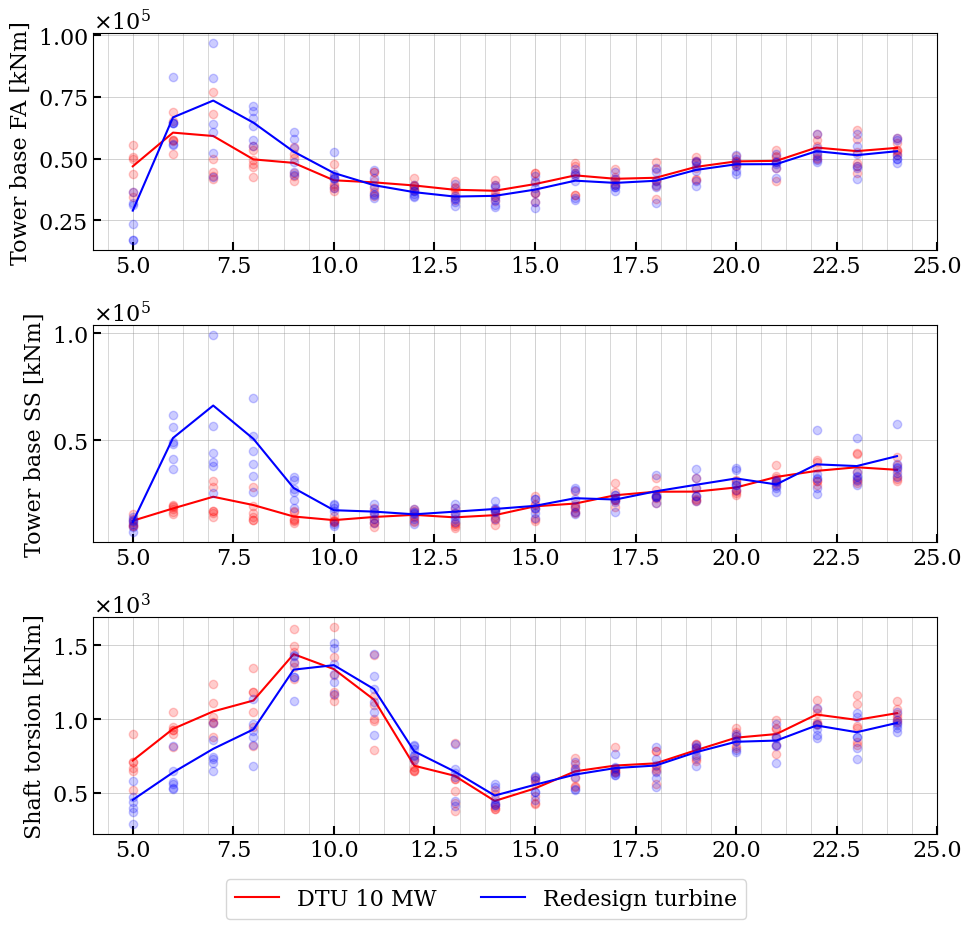

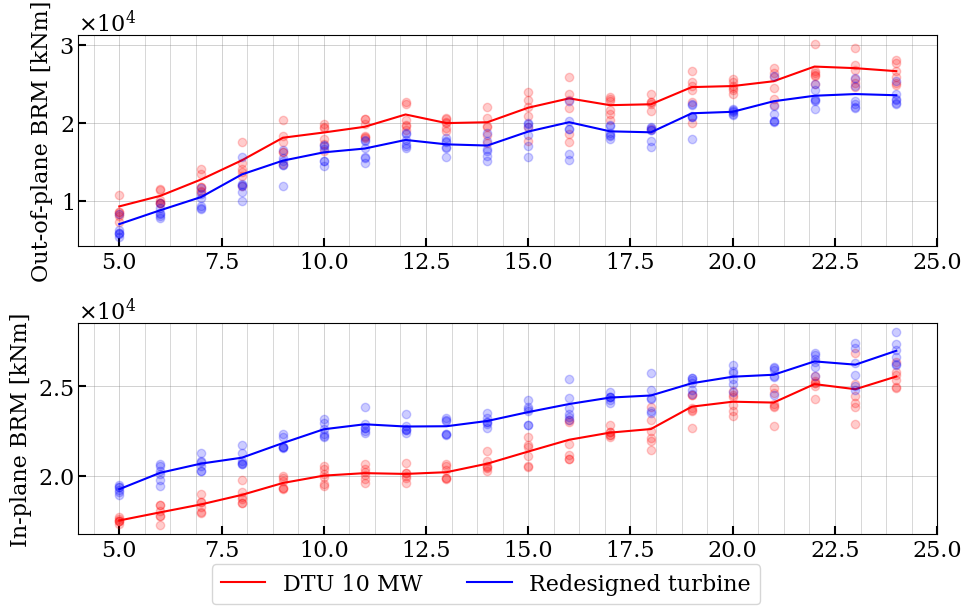

5.0 719.5000981662964
6.0 934.0350306560509
7.0 1052.3896309505956
8.0 1126.302877108446
9.0 1440.5246351141975
10.0 1339.0949180127827
11.0 1131.5998812056696
12.0 684.1141408686643
13.0 616.3838806735914
14.0 445.5186772980877
15.0 530.5374956199905
16.0 646.440913905623
17.0 685.5765059238288
18.0 700.4733458020559
19.0 789.1095411656505
20.0 874.3354258252035
21.0 898.9201643985585
22.0 1031.3563563297291
23.0 995.0525091754346
24.0 1040.5485179477466


In [8]:
# fatigue analysis

# list of considered elements
#wohler_4 = ['TbFA', 'TbSS', 'YbTilt', 'YbRoll', 'ShftTrs']
wohler_4 = ['TbFA', 'TbSS', 'ShftTrs']
wohler_10 =  ['OoPBRM', 'IPBRM']
#wohler_4_title = ['Tower base FA [kNm]', 'Tower base SS [kNm]',
#                  'Yaw-bearing tilt [kNm]', 'Yaw-bearing roll [kNm]','Shaft torsion [kNm]']
wohler_4_title = ['Tower base FA [kNm]', 'Tower base SS [kNm]','Shaft torsion [kNm]']
wohler_10_title = ['Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']


data_DTU = DEL_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_4, wohler_10)
data_redesign = DEL_calculation('Group1_turb_C8.csv', 'tcb',  CHAN_DESCS, wohler_4, wohler_10)

printing = True
if printing:
    # table of used wohler exponents
    print(f'   element     |   meterial  |    wohler exp    ')
    for iplot, chan_id in enumerate(wohler_4):
        print(f"   {chan_id:10}  |    metal    | {data_redesign[chan_id]['wohler_exp']:10.1f} ")
    for iplot, chan_id in enumerate(wohler_10):
        print(f"   {chan_id:10}  |  composite  | {data_redesign[chan_id]['wohler_exp']:10.1f} ")
    print('')

    print(f'   element     | R eq life DTU   |  R eq life redesign  |  difference [%]')
    for iplot, chan_id in enumerate(wohler_4 + wohler_10):
        diff = (data_redesign[chan_id]['R_eql'] - data_DTU[chan_id]['R_eql']) / data_DTU[chan_id]['R_eql'] * 100
        print(f"   {chan_id:10}  |   {data_DTU[chan_id]['R_eql']:10.3f}    |      {data_redesign[chan_id]['R_eql']:10.3f}      |   {diff:6.3f}")



fig, axs = plt.subplots(3, 1, figsize=(10, 9), clear=True)

for iplot, chan_id in enumerate(wohler_4):

    ax = axs.flatten()[iplot]
    ax.plot(data_DTU[chan_id]['scatter_wind'], data_DTU[chan_id]['scatter_load'], 'o', alpha = 0.2, color='r')
    ax.plot(data_DTU[chan_id]['ws'], data_DTU[chan_id]['R_eq'], color='r', label='DTU 10 MW'if iplot == 0 else "")

    ax.plot(data_redesign[chan_id]['scatter_wind'], data_redesign[chan_id]['scatter_load'], 'o', alpha = 0.2, color='b')
    ax.plot(data_redesign[chan_id]['ws'], data_redesign[chan_id]['R_eq'], color='b', label='Redesign turbine'if iplot == 0 else "")

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  4 else None,
           ylabel=f'{wohler_4_title[iplot]}', xlim=[4, 25])
    
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)
fig.tight_layout()
fig.savefig(f'plots/DEL_steel.pdf', format='pdf',bbox_inches='tight')
plt.show()


fig, axs = plt.subplots(2, 1, figsize=(10, 6), clear=True)

for iplot, chan_id in enumerate(wohler_10):

    ax = axs.flatten()[iplot]
    ax.plot(data_DTU[chan_id]['scatter_wind'], data_DTU[chan_id]['scatter_load'], 'o', alpha = 0.2, color='r')
    ax.plot(data_DTU[chan_id]['ws'], data_DTU[chan_id]['R_eq'], color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(data_redesign[chan_id]['scatter_wind'], data_redesign[chan_id]['scatter_load'], 'o', alpha = 0.2, color='b')
    ax.plot(data_redesign[chan_id]['ws'], data_redesign[chan_id]['R_eq'], color='b', label='Redesigned turbine'if iplot == 0 else "")

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  1 else None,
           ylabel=f'{wohler_10_title[iplot]}', xlim=[4, 25])
    
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)
fig.tight_layout()
fig.savefig(f'plots/DEL_composites.pdf', format='pdf',bbox_inches='tight')
plt.show()

for i in range(20):
    print(data_DTU['ShftTrs']['ws'][i], data_DTU['ShftTrs']['R_eq'][i])



C:\Users\nicol\AppData\Local\Temp\ipykernel_5220\2962496664.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Reql edge
   element     | R eq life DTU   |  R eq life redesign  |  difference [%]
   EdgBRM      |    29182.724    |       31700.970      |    8.629


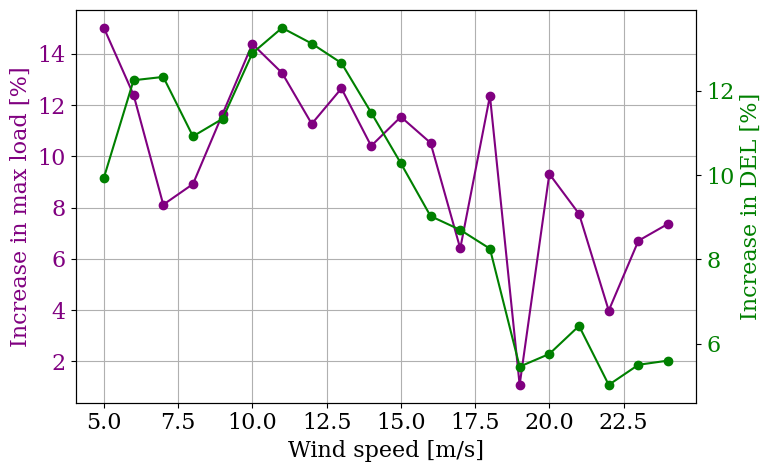

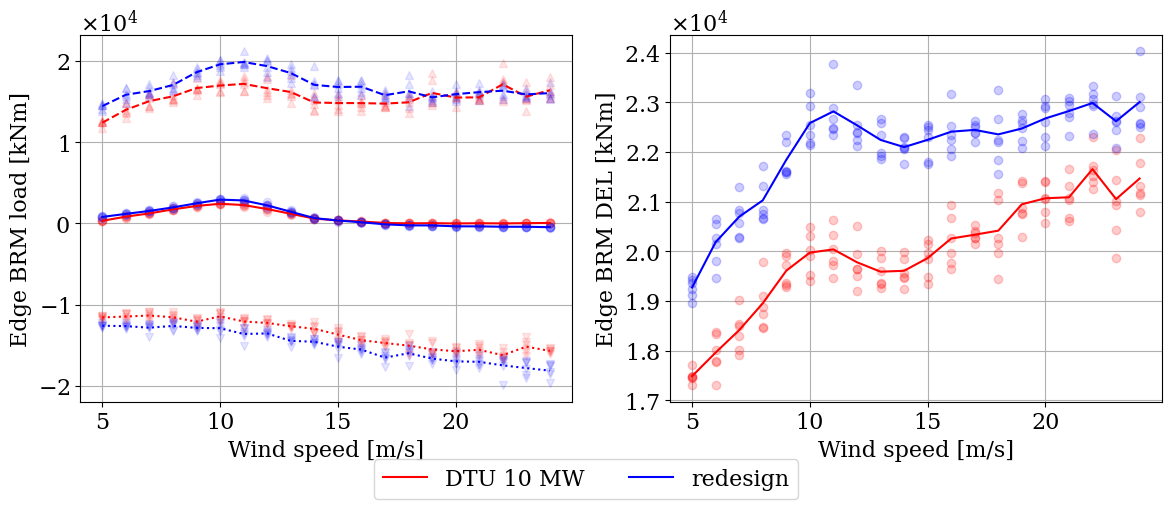

C:\Users\nicol\AppData\Local\Temp\ipykernel_5220\2962496664.py:97: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


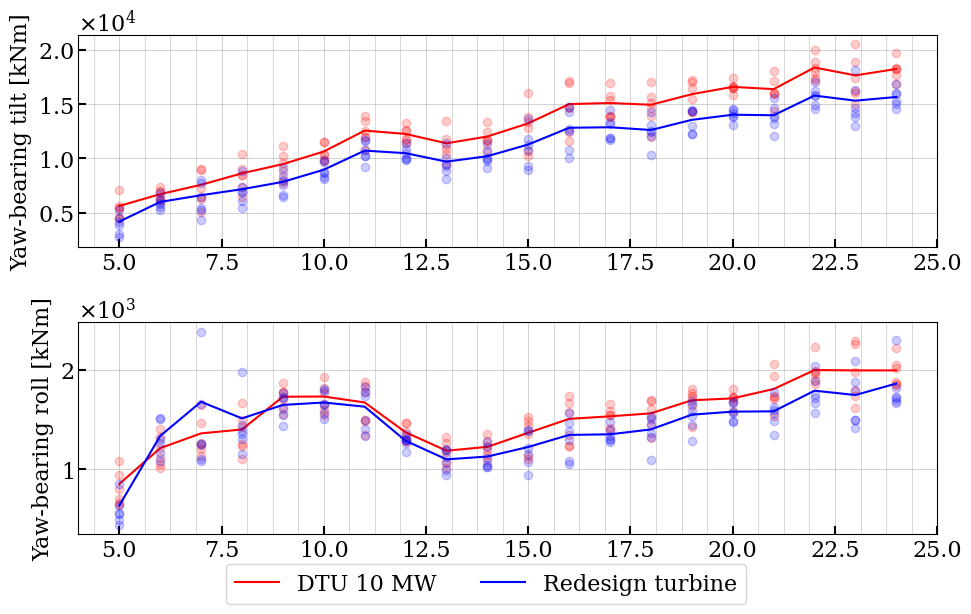

In [13]:
# additional graph

wohler_10 = ['IPBRM']
wohler_4 = []

DEL_DTU = DEL_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_4, wohler_10)
DEL_our = DEL_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, wohler_4, wohler_10)
load_DTU = load_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_10)
load_our = load_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, wohler_10)

DEL_percent = (DEL_our['IPBRM']['R_eq'] - DEL_DTU['IPBRM']['R_eq']) / DEL_DTU['IPBRM']['R_eq']*100
load_percent = (load_our['IPBRM']['max']['ave'] - load_DTU['IPBRM']['max']['ave']) / load_DTU['IPBRM']['max']['ave']* 100
ws = DEL_DTU['IPBRM']['ws']

color1 = 'purple'
color2 = 'green'
fig, ax1 = plt.subplots(figsize=(8, 5))

# First plot (left y-axis)
ax1.plot(ws, load_percent, marker='o', label='Max Load [%]', color=color1)
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Increase in max load [%]', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid()

# Second plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(ws, DEL_percent, marker='o', label='DEL [%]', color=color2)
ax2.set_ylabel('Increase in DEL [%]', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
fig.savefig(f'plots/relation_loads_DEL.pdf', format='pdf',bbox_inches='tight')
fig.show()






wohler_10 = ['EdgBRM']
wohler_4 = []
chan_id = wohler_10[0]

DEL_DTU = DEL_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_4, wohler_10)
DEL_our = DEL_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, wohler_4, wohler_10)
loads_DTU = load_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_10)
loads_our = load_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, wohler_10)

print('Reql edge', )

fig, axs = plt.subplots(1, 2, figsize=(12, 5), clear=True)
ax = axs[0]

ax.plot(loads_DTU[chan_id]['min']['scatter_wind'],  loads_DTU[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='r')
ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
ax.plot(loads_DTU[chan_id]['max']['scatter_wind'],  loads_DTU[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='r')
ax.plot(loads_our[chan_id]['min']['scatter_wind'],  loads_our[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='b')
ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
ax.plot(loads_our[chan_id]['max']['scatter_wind'],  loads_our[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='b')

ax.plot(loads_DTU[chan_id]['min']['ws'],  loads_DTU[chan_id]['min']['ave'], linestyle = 'dotted', color='r')
ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle = 'solid', color='r', label='DTU 10 MW')
ax.plot(loads_DTU[chan_id]['max']['ws'],  loads_DTU[chan_id]['max']['ave'], linestyle = 'dashed', color='r')
ax.plot(loads_our[chan_id]['min']['ws'],  loads_our[chan_id]['min']['ave'], linestyle = 'dotted', color='b')
ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle = 'solid', color='b', label='redesign')
ax.plot(loads_our[chan_id]['max']['ws'],  loads_our[chan_id]['max']['ave'], linestyle = 'dashed', color='b')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
ax.grid()
ax.set_xlabel('Wind speed [m/s]')
ax.set_ylabel('Edge BRM load [kNm]')

print(f'   element     | R eq life DTU   |  R eq life redesign  |  difference [%]')
for iplot, chan_id in enumerate(wohler_4 + wohler_10):
    diff = (DEL_our[chan_id]['R_eql'] - DEL_DTU[chan_id]['R_eql']) / DEL_DTU[chan_id]['R_eql'] * 100
    print(f"   {chan_id:10}  |   {DEL_DTU[chan_id]['R_eql']:10.3f}    |      {DEL_our[chan_id]['R_eql']:10.3f}      |   {diff:6.3f}")



ax = axs[1]
ax.plot(DEL_DTU[chan_id]['scatter_wind'], DEL_DTU[chan_id]['scatter_load'], 'o', alpha = 0.2, color='r')
ax.plot(DEL_DTU[chan_id]['ws'], DEL_DTU[chan_id]['R_eq'], color='r')
ax.plot(DEL_our[chan_id]['scatter_wind'], DEL_our[chan_id]['scatter_load'], 'o', alpha = 0.2, color='b')
ax.plot(DEL_our[chan_id]['ws'], DEL_our[chan_id]['R_eq'], color='b')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
ax.grid()
ax.set_xlabel('Wind speed [m/s]')
ax.set_ylabel('Edge BRM DEL [kNm]')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)
fig.tight_layout()
fig.savefig(f'plots/edge.pdf', format='pdf',bbox_inches='tight')
plt.show()
fig.show()




# fatigue analysis

# list of considered elements
wohler_4 = ['YbTilt', 'YbRoll']
wohler_10 =  []
wohler_4_title = ['Yaw-bearing tilt [kNm]', 'Yaw-bearing roll [kNm]']
wohler_10_title = []

data_DTU = DEL_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_4, wohler_10)
data_redesign = DEL_calculation('Group1_turb_C8.csv', 'tcb',  CHAN_DESCS, wohler_4, wohler_10)

fig, axs = plt.subplots(2, 1, figsize=(10, 6), clear=True)

for iplot, chan_id in enumerate(wohler_4):

    ax = axs.flatten()[iplot]
    ax.plot(data_DTU[chan_id]['scatter_wind'], data_DTU[chan_id]['scatter_load'], 'o', alpha = 0.2, color='r')
    ax.plot(data_DTU[chan_id]['ws'], data_DTU[chan_id]['R_eq'], color='r', label='DTU 10 MW'if iplot == 0 else "")

    ax.plot(data_redesign[chan_id]['scatter_wind'], data_redesign[chan_id]['scatter_load'], 'o', alpha = 0.2, color='b')
    ax.plot(data_redesign[chan_id]['ws'], data_redesign[chan_id]['R_eq'], color='b', label='Redesign turbine'if iplot == 0 else "")

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  4 else None,
           ylabel=f'{wohler_4_title[iplot]}', xlim=[4, 25])
    
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)
fig.tight_layout()
fig.savefig(f'plots/DEL_yaw.pdf', format='pdf',bbox_inches='tight')
plt.show()


## EXTREME VALUES

 name       |   DTU       | redesign
 TbFA       | 364297.4736 | 339878.6631
 TbSS       | 117720.3153 | 128547.8976
 YbTilt     | 54987.89063 | 45624.71667
 YbRoll     | 23907.45795 | 26146.5488
 ShftTrs    | 20365.17133 | 23640.8508
 OoPBRM     | 72275.13831 | 69683.39539
 IPBRM      | 40770.70642 | 43775.12823


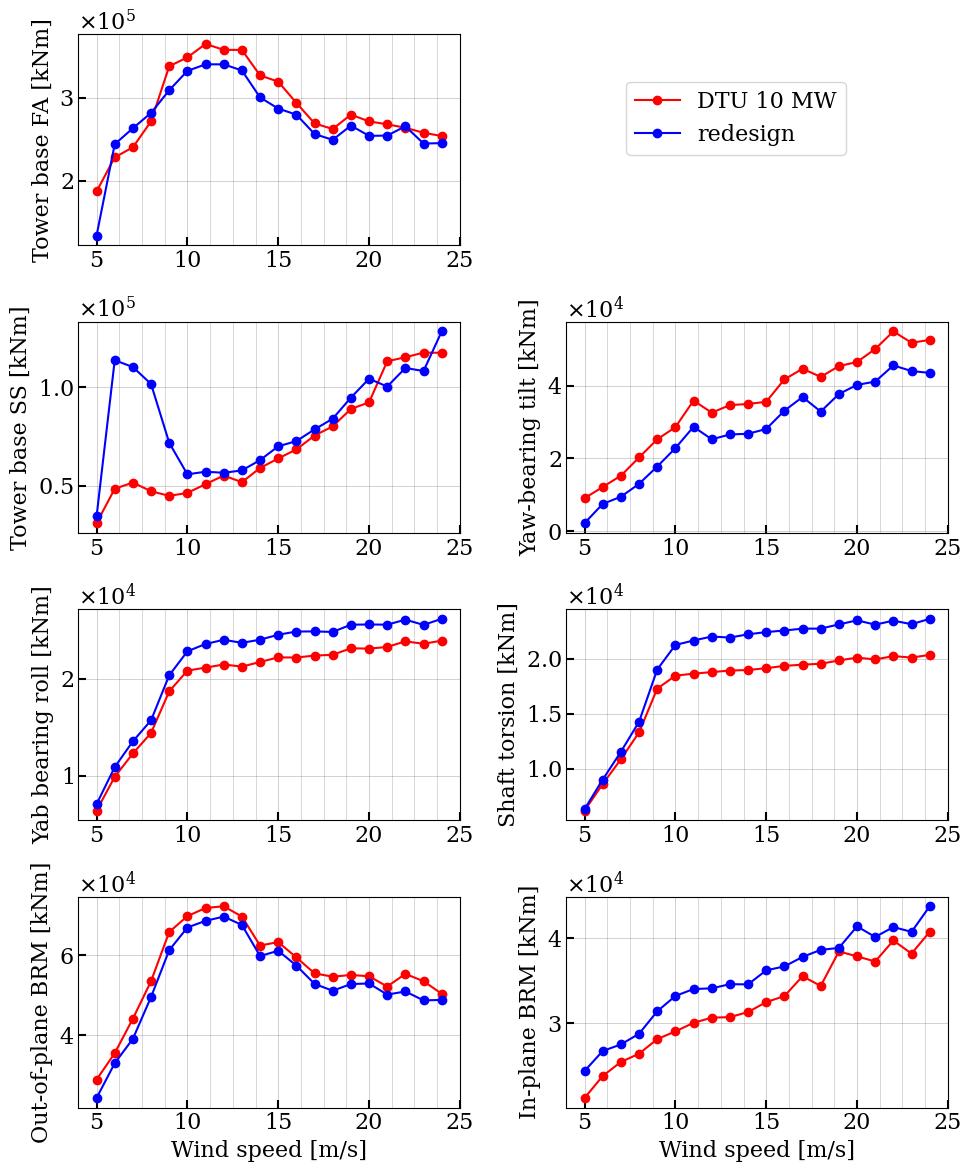

In [ ]:
# extreme values

chan_ids = ['TbFA', 'TbSS', 'YbTilt', 'YbRoll', 'ShftTrs', 'OoPBRM', 'IPBRM']
chan_title = ['Tower base FA [kNm]', 'Tower base SS [kNm]','Yaw-bearing tilt [kNm]', 'Yab bearing roll [kNm]',
             'Shaft torsion [kNm]', 'Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']

extreme_DTU = load_calculation('dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids)
extreme_our = load_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids)

extreme_list_DTU = []
extreme_list_our = []

'''
fig, axs = plt.subplots(7, 1, figsize=(10, 20), clear=True)
for iplot, chan_id in enumerate(chan_ids):

    ax = axs.flatten()[iplot]

    if max(extreme_DTU[chan_id]['max']['ave']) > max(abs(extreme_DTU[chan_id]['min']['ave'])):
        extreme_array_DTU = extreme_DTU[chan_id]['max']['ave']*1.35*1.25
    else:
        extreme_array_DTU = abs(extreme_DTU[chan_id]['min']['ave'])*1.35*1.25
    extreme_list_DTU.append(max(extreme_array_DTU))
    ax.plot(extreme_DTU[chan_id]['mean']['ws'], extreme_array_DTU, marker='o', color='r',  label='DTU 10 MW'if iplot == 0 else "")


    if max(extreme_our[chan_id]['max']['ave']) > max(abs(extreme_our[chan_id]['min']['ave'])):
        extreme_array_our = extreme_our[chan_id]['max']['ave'] *1.35*1.25
    else:
        extreme_array_our = abs(extreme_our[chan_id]['min']['ave'] )*1.35*1.25
    extreme_list_our.append(max(extreme_array_our))
    ax.plot(extreme_our[chan_id]['mean']['ws'], extreme_array_our, marker='o', color='b',  label='redesign'if iplot == 0 else "")

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  5 else None,
           ylabel=f'{chan_title[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2)
fig.tight_layout()
fig.savefig(f'plots/extreme_loads.pdf', format='pdf',bbox_inches='tight')
'''


fig, axs = plt.subplots(4, 2, figsize=(10, 12), clear=True)
plot_positions = [(0, 0), 
                  (1, 0), (1, 1),
                  (2, 0), (2, 1),
                  (3, 0), (3, 1),] 

for iplot, chan_id in enumerate(chan_ids):

    row, col = plot_positions[iplot]  # Get row and column indices for each plot
    ax = axs[row, col]

    if max(extreme_DTU[chan_id]['max']['ave']) > max(abs(extreme_DTU[chan_id]['min']['ave'])):
        extreme_array_DTU = extreme_DTU[chan_id]['max']['ave']*1.35*1.25
    else:
        extreme_array_DTU = abs(extreme_DTU[chan_id]['min']['ave'])*1.35*1.25
    extreme_list_DTU.append(max(extreme_array_DTU))
    ax.plot(extreme_DTU[chan_id]['mean']['ws'], extreme_array_DTU, marker='o', color='r',  label='DTU 10 MW'if iplot == 0 else "")


    if max(extreme_our[chan_id]['max']['ave']) > max(abs(extreme_our[chan_id]['min']['ave'])):
        extreme_array_our = extreme_our[chan_id]['max']['ave'] *1.35*1.25
    else:
        extreme_array_our = abs(extreme_our[chan_id]['min']['ave'] )*1.35*1.25
    extreme_list_our.append(max(extreme_array_our))
    ax.plot(extreme_our[chan_id]['mean']['ws'], extreme_array_our, marker='o', color='b',  label='redesign'if iplot == 0 else "")

    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  4 else None,
           ylabel=f'{chan_title[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

fig.delaxes(axs[0, 1])
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.75, 0.85), ncol=1)
fig.tight_layout()
fig.savefig(f'plots/extreme_loads.pdf', format='pdf',bbox_inches='tight')


print(' name       |   DTU       | redesign')
for i in range(len(extreme_list_DTU)):
    print(f' {chan_ids[i]:10} | {extreme_list_DTU[i]:6.10} | {extreme_list_our[i]:5.10}')

plt.show()



# AEP

In [11]:
## Calculating AEP

DTU_AEP = AEP_calculation('dtu_10mw_turb_stats.hdf5', 'tcb', CHAN_DESCS)
redesigned_AEP_general = AEP_calculation('Group1_turb.csv', 'tcb', CHAN_DESCS)
redesigned_AEP_C1 = AEP_calculation('Group1_turb_C1.csv', 'tcb', CHAN_DESCS)
redesigned_AEP_C8 = AEP_calculation('Group1_turb_C8.csv', 'tcb', CHAN_DESCS)

print(f'DTU              : {DTU_AEP['AEP']:3.8}')
print(f'redesign generic : {redesigned_AEP_general['AEP']:3.8}')
print(f'redesign C1      : {redesigned_AEP_C1['AEP']:3.8}')
print(f'redesign C8      : {redesigned_AEP_C8['AEP']:3.8}')


filename1 = 'our_design/data/Group1_redesign_flex.opt'
opt_data1 = load_oper(filename1)
# Display the data to confirm it's loaded correctly
wind_speeds_redesign = opt_data1['ws_ms']
aero_power_redesign = opt_data1['power_kw']

print(DTU_AEP['prob'])

#plt.figure()
#plt.plot(DTU_AEP['ws'], DTU_AEP['power']*1e6, label='csv')
#plt.plot(wind_speeds_redesign, aero_power_redesign*1e3, label='opt')
#plt.legend()
#plt.show()

DTU              : 33.946575
redesign generic : 33.850729
redesign C1      : 33.546251
redesign C8      : 33.542751
[0.09822154 0.10112075 0.09843279 0.09128194 0.08103839 0.06910383
 0.05673472 0.04492539 0.03435648 0.02540085 0.01817049 0.01258493
 0.00844375 0.00549053 0.0034614  0.00211633 0.00125524 0.00072242
 0.0004035  0.00021877]
